Import libraries

In [1]:
import os
import sys
import copy
import time
import importlib
import numpy as np
import pandas as pd

Visual set up

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt

# Get colors list
colors = mpl.rcParams['axes.prop_cycle'].by_key()['color']*10
%matplotlib inline

Define case and figures directory

In [3]:
case_dir = "../"
path = os.getcwd() + '/figs/'
if not os.path.exists(path):
    os.makedirs(path)

Plotter

In [4]:
def plot_var(
    t,
    y,
    var_names=None,
    fig_name=None,
    labels=[None, None],
    scales=['log', 'linear'],
    xlim=None,
    ylim=None,
    save=True,
    path=None,
    fig_ax=None,
    max_num_var=9
):
    if fig_ax is None:
        fig, ax = plt.subplots()
    else:
        fig, ax = fig_ax

    # Set up figure -----------------------------------------------------------
    x_label, y_label = labels
    x_scale, y_scale = scales
    # X axis
    if x_label is not None:
        ax.set_xlabel(x_label)
    if x_scale is not None:
        ax.set_xscale(x_scale)
    if xlim is not None:
        ax.set_xlim(xlim)
    elif x_scale != 'log':
        ax.set_xlim([min(x), max(x)])
    # Y axis
    if y_label is not None:
        ax.set_ylabel(y_label)
    if y_scale is not None:
        ax.set_yscale(y_scale)
    # Check 2nd dim: looping over columns
    if len(y.shape) < 2:
        y = np.expand_dims(y, 1)

    # Plot figure -------------------------------------------------------------
    # Define parameters
    n = y.shape[1]
    # Loop over features
    for i in range(n):
        ax.plot(
            t,
            y[:,i],
            lw=1.,
            c=colors[i]
        )
    # Add legend
    if var_names is not None:
        idx = np.arange(0,n)
        if n > 6:
            if n > max_num_var:
                step = int(np.ceil(n/max_num_var))
                idx = np.arange(0,n,step)
                n = max_num_var
            fs = 'small'
        else:
            fs = 'medium'
        ax.legend(
            [plt.plot([], [], c=colors[i])[0] for i in idx],
            [var_names[i] for i in idx],
            fontsize=fs,
            ncol=int(np.ceil(n/3))
        )

    # Save figure -------------------------------------------------------------
    if save:
        # Save figure
        fig_path = path + '/' + fig_name + '.pdf'
        fig.savefig(fig_path)
        
    if fig_ax is not None:
        return fig, ax

Load output data file

In [12]:
df = pd.read_csv(case_dir + '/outputs/out.csv')  

Define time vector

In [13]:
t_col = [c for c in df.columns if 't' in c]
t = df[t_col[0]].to_numpy()
tlim = [1.e-12, 1.e-2]

Plot mass fractions

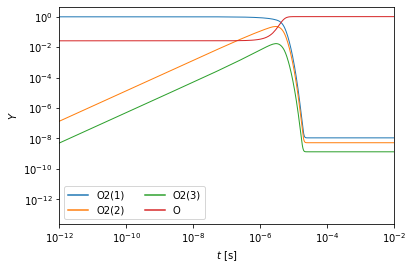

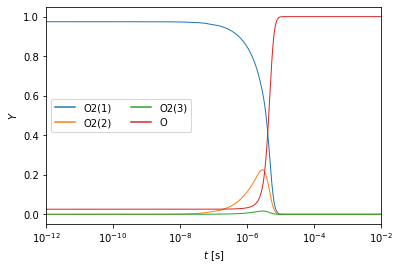

In [14]:
col = [c for c in df.columns if 'Y' in c]
y = df[col].to_numpy()
var_names = [c.split("_")[1] for c in col]

for y_scale in ('log', 'linear'):
    plot_var(
        t,
        y,
        var_names=var_names,
        fig_name='Y_'+y_scale,
        labels=[r'$t$ [s]', r'$Y$'],
        scales=['log', y_scale],
        xlim=tlim,
        path=path
    )

Plot temperature

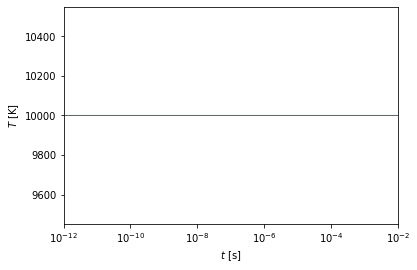

In [15]:
col = [c for c in df.columns if 'T' in c]
y = df[col[0]].to_numpy()

plot_var(
    t,
    y,
    fig_name='T',
    labels=[r'$t$ [s]', r'$T$ [K]'],
    scales=['log', 'linear'],
    xlim=tlim,
    path=path
)

Plot pressure

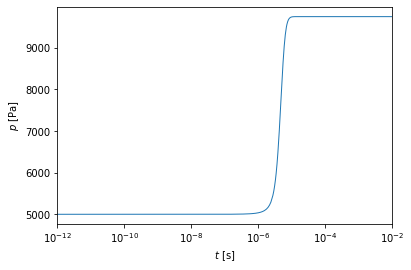

In [16]:
col = [c for c in df.columns if 'p' in c]
y = df[col[0]].to_numpy()

plot_var(
    t,
    y,
    fig_name='p',
    labels=[r'$t$ [s]', r'$p$ [Pa]'],
    scales=['log', 'linear'],
    xlim=tlim,
    path=path
)

Plot number density

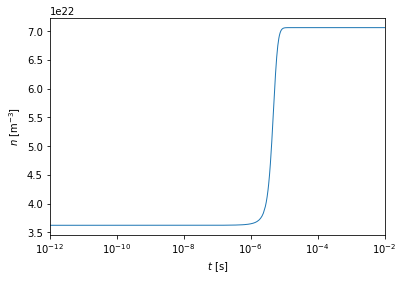

In [17]:
col = [c for c in df.columns if 'n' in c]
y = df[col].to_numpy()

plot_var(
    t,
    y,
    fig_name='n',
    labels=[r'$t$ [s]', r'$n$ [m$^{-3}$]'],
    scales=['log', 'linear'],
    xlim=tlim,
    path=path
)

Plot energy

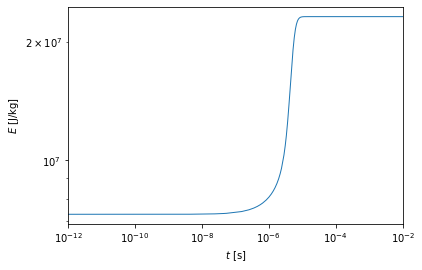

In [11]:
col = [c for c in df.columns if 'E' in c]
y = df[col].to_numpy()

plot_var(
    t,
    y,
    fig_name='E',
    labels=[r'$t$ [s]', r'$E$ [J/kg]'],
    scales=['log', 'log'],
    xlim=tlim,
    path=path
)